<a href="https://colab.research.google.com/github/Salma-21/MNIST-CLASSIFICATION/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the Train data description
              label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
count  60000.0  60000.0  60000.0  ...  60000.000000  60000.000000   
mean       0.0      0.0      0.0  ...      0.200433      0.088867   
std        0.0      0.0      0.0  ...      6.042472      3.95618

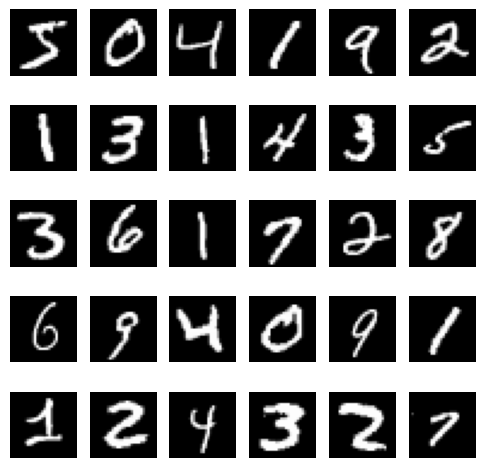

                      ---------------------------------------------------------------------

KNN:
Best parameter:KNeighborsClassifier(n_neighbors=3, weights='distance')
Accuracy:97.36%
num of all instance:"12000
number of correct classified:11683
                      ---------------------------------------------------------------------
Epoch 1/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3557 - accuracy: 0.9074 - val_loss: 0.1716 - val_accuracy: 0.9506
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1339 - accuracy: 0.9603 - val_loss: 0.1226 - val_accuracy: 0.9613
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0890 - accuracy: 0.9739 - val_loss: 0.0965 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.0931 - val_accuracy: 0.9719
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0496 

In [ ]:
##our model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import drive


# Load the dataset
mnist_train_data = pd.read_csv('/content/drive/MyDrive/Databases/mnist_train.csv')
mnist_test_data = pd.read_csv('/content/drive/MyDrive/Databases/mnist_test.csv')

print("This is the Train data description")
print(mnist_train_data.describe())

# Data exploration
print("\nNumber of unique classes:", mnist_train_data['label'].nunique())
print("Number of features (pixels):", len(mnist_train_data.columns) - 1)  # Subtract 1 for the label column

# check for missing values
print("\nNull Values:")
print(mnist_train_data.isnull().sum())

# Drop rows with NaN values in any column if there is any
mnist_train_data.dropna(inplace=True)

# Extract features and labels
X_train = mnist_train_data.iloc[:, 1:]  # Features (pixels), select all rows & columns starting from the second column
y_train = mnist_train_data['label']  # Labels

# Normalize each pixel value by dividing it by 255
X_train = X_train / 255.0

# Resize images to dimensions of 28 by 28.
X_train = X_train.values.reshape(-1, 28, 28, 1)

# Visualize some images
print("\nThis is a visualize for some images:")
plt.figure(figsize=(6, 6))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
print("                      ---------------------------------------------------------------------")

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

Knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': np.arange(3, 5, 7),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(Knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_flat, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

Y_pred = best_knn.predict(X_val_flat)
accuracy2 = accuracy_score(y_val, Y_pred)

# Evaluate the model
print(f'\nKNN:')
print(f'Best parameter:{best_knn}')
print(f'Accuracy:{accuracy2 * 100:.2f}%')
print(f'num of all instance:"{len(y_val)}')

print(f'number of correct classified:{np.sum(Y_pred == y_val)}')

print("                      ---------------------------------------------------------------------")

# Define the number of features and classes
num_classes = 10  # Example for a 10-class classification problem

# Model 2: 2 hidden layers with 128 and 64 neurons, ReLU and sigmoid activations
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(num_classes, activation='softmax')
])

# Model 3: 3 hidden layers with 256, 128, and 64 neurons, all with ReLU activation
model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile all models with the same optimizer and loss function for consistency
for model in [model2, model3]:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print the summary of each model

model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

test_loss, test_accuracy1 = model2.evaluate(X_val, y_val)
# طباعة الخسارة والدقة لبيانات الاختبار
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_accuracy1)

test_loss, test_accuracy2 = model3.evaluate(X_val, y_val)
# طباعة الخسارة والدقة لبيانات الاختبار
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_accuracy2)
y_pred_model2 = model2.predict(X_val)
y_pred_model3 = model3.predict(X_val)

# yomna_Compare
knn_accuracy = accuracy2
ann_model1_accuracy = test_accuracy1
ann_model2_accuracy = test_accuracy2

if  knn_accuracy > max(ann_model1_accuracy, ann_model2_accuracy):
    our_best_model = "KNN"
    our_best_model_accuracy =  knn_accuracy
    our_best_model_confusion_matrix = confusion_matrix(y_val, Y_pred)
elif ann_model1_accuracy > ann_model2_accuracy:
    our_best_model = "Ann --> model1"
    our_best_model_accuracy = ann_model1_accuracy
     # تحويل التنبؤات إلى تسميات فعلية إذا كانت في صورة احتمالات
    if len(y_pred_model2.shape) > 1:  # يفترض وجود أكثر من بُعد (في حالة الاحتمالات)
        y_pred_model2 = tf.argmax(y_pred_model2, axis=1)
    # تحويل y_pred_model3 إلى نفس تنسيق y_val
    y_pred_model2 = y_pred_model2.numpy() if hasattr(y_pred_model2, 'numpy') else y_pred_model2
    our_best_model_confusion_matrix = confusion_matrix(y_val, y_pred_model2)
else:
    our_best_model = "Ann --> model2"
    our_best_model_accuracy = ann_model2_accuracy
    # تحويل التنبؤات إلى تسميات فعلية إذا كانت في صورة احتمالات
    if len(y_pred_model3.shape) > 1:  # يفترض وجود أكثر من بُعد (في حالة الاحتمالات)
        y_pred_model3 = tf.argmax(y_pred_model3, axis=1)
    # تحويل y_pred_model3 إلى نفس تنسيق y_val
    y_pred_model3 = y_pred_model3.numpy() if hasattr(y_pred_model3, 'numpy') else y_pred_model3
    our_best_model_confusion_matrix = confusion_matrix(y_val, y_pred_model3)
print("Best Model is:", our_best_model)
print("Best Model Accuracy:", our_best_model_accuracy)
print("Best Model Confusion Matrix:")
print(our_best_model_confusion_matrix)

print("                      ---------------------------------------------------------------------")

In [ ]:
from sklearn.model import joblib

# Save the best model to a file
model_filename = '/best_model.h5'  # Use .h5 extension for Keras models
knn_model_filename = '/best_knn_model.joblib'  # Use .joblib extension for scikit-learn models

if "Ann --> model1" in our_best_model:
    # Save the ANN model if it's a TensorFlow/Keras model
    model2.save(model_filename)
elif "Ann --> model2" in our_best_model:
    # Save the ANN model if it's a TensorFlow/Keras model
    model3.save(model_filename)

# If the best model is a KNN model
elif "KNN" in our_best_model:
    # Save the KNN model using joblib
    joblib.dump(best_knn, knn_model_filename)

# Reload the best model from the file
if "Ann" in our_best_model:
    # Load the ANN model
    loaded_model = tf.keras.models.load_model(model_filename)
else:
    # Load the model using joblib if it's not a TensorFlow/Keras model
    if "KNN" in our_best_model:
        loaded_model = joblib.load(knn_model_filename)
    else:
        loaded_model = joblib.load(model_filename)

# Extract features and labels for the test set
X_test = mnist_test_data.iloc[:, 1:]  # Features (pixels)
y_test = mnist_test_data['label']  # Labels

# Normalize each pixel value by dividing it by 255
X_test = X_test / 255.0

# Resize images to dimensions of 28 by 28.
X_test = X_test.values.reshape(-1, 28, 28, 1)

# If the best model is an ANN model
if "Ann" in our_best_model:
    # Evaluate the loaded ANN model on the testing data
    test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
    print(f'Test Loss on test set: {test_loss}')
    print(f'Test Accuracy on test set: {test_accuracy * 100:.2f}%')

# If the best model is a KNN model
elif "KNN" in our_best_model:
    # Reshape X_test for KNN
    new_x_test = X_test.reshape(X_test.shape[0], -1) #reshape to 2d array
    # Make predictions on the testing data
    Y_test_pred = loaded_model.predict(new_x_test)
    # Evaluate the KNN model
    accuracy_test = accuracy_score(y_test, Y_test_pred)
    print(f'Test Accuracy using the best KNN model: {accuracy_test * 100:.2f}%')

# If the best model is an ANN model
elif "Ann" in our_best_model:
    # Evaluate the loaded ANN model on the testing data
    test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
    print(f'Test Loss on test set: {test_loss}')
    print(f'Test Accuracy on test set: {test_accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 7ms/step - loss: 0.0931 - accuracy: 0.9796
Test Loss on test set: 0.0931062325835228
Test Accuracy on test set: 97.96%
